#### 1. Take one of the supervised learning models you have built recently and apply at least three dimensionality reduction techniques to it (separately). Be sure to create a short summary of each technique you use. Indicate how each changed the model performance. Reference: https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

crime_df = pd.read_csv('USArrests.csv')
crime_df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


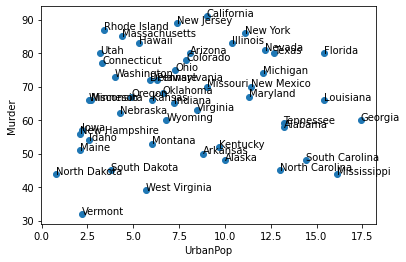

In [2]:
from sklearn.cluster import KMeans
X = crime_df.drop('State',axis=1)
y = crime_df['State']

plt.scatter(X['Murder'],X['UrbanPop'])

for i,txt in enumerate(y):
    plt.annotate(txt, (X['Murder'][i],X['UrbanPop'][i]))
plt.xlabel('UrbanPop')
plt.ylabel('Murder')
plt.show()

### Principal Component Analysis


The scikit-learn library provides the PCA class implementation of Principal Component Analysis that can be used as a dimensionality reduction data transform. The “n_components” argument can be set to configure the number of desired dimensions in the output of the transform.

In [3]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.824 (0.034)


### Linear Discriminant Analysis

Linear Discriminant Analysis, or LDA, is a multi-class classification algorithm that can be used for dimensionality reduction.

The number of dimensions for the projection is limited to 1 and C-1, where C is the number of classes. In this case, our dataset is a binary classification problem (two classes), limiting the number of dimensions to 1.

In [4]:
# evaluate lda with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.825 (0.034)


### Isomap Embedding

Isomap Embedding, or Isomap, creates an embedding of the dataset and attempts to preserve the relationships in the dataset.

The scikit-learn library provides the Isomap class implementation of Isomap Embedding that can be used as a dimensionality reduction data transform. The “n_components” argument can be set to configure the number of desired dimensions in the output of the transform.

In [5]:
# evaluate isomap with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import Isomap
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('iso', Isomap(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.888 (0.029)


In this case, we can see a lift in performance with the Isomap data transform as compared to the baseline fit on the raw data

#### 2. Write a function that will indicate if an inputted IPv4 address is accurate or not. IP addresses are valid if they have 4 values between 0 and 255 (inclusive), punctuated by periods.
    
    Input 1: 2.33.245.5 Output 1: True
            
    Input 2: 12.345.67.89 Output 2: False

In [6]:
# Python program to validate an Ip address
 
# re module provides support
# for regular expressions
import re
 
# Make a regular expression
# for validating an Ip-address
regex = "^((25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9])\.){3}(25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9])$"
 
 
     
# Define a function for
# validate an Ip address
def check(Ip):
 
    # pass the regular expression
    # and the string in search() method
    if(re.search(regex, Ip)):
        print("true")
         
    else:
        print("false")
     
 
# Driver Code
if __name__ == '__main__' :
     
    # Enter the Ip address
    Ip = "2.33.245.5"
     
    # calling run function
    check(Ip)
 
    Ip = "112.345.67.89"
    check(Ip)
 
    Ip = "2.33.245.5"
    check(Ip)
    

true
false
true
